In [1]:
%load_ext autoreload
%autoreload 2
from face_lib.dataset_classes.lightning_datasets import MXFaceDataset
import numpy as np
from tqdm import tqdm

In [2]:
num_classes = 3531
ds = MXFaceDataset('/app/datasets/ms1m/', True, num_classes)

## Create meta files

In [3]:
num_probe_templates = 4
gallery_size = 1772

num_classes = 3531
ds = MXFaceDataset('/app/datasets/ms1m/', True, num_classes)

In [12]:
len(np.unique(ds.labels))

3438

In [15]:
10 // 3, 10 % 3

(3, 1)

In [31]:
(class_ids, poses, counts) = np.unique(ds.labels, return_index=True, return_counts=True)

In [33]:
seed = 0
rng = np.random.default_rng(seed)
num_probe_templates = 4
mid = np.arange(len(ds.labels))
name = np.arange(len(ds.labels))
tid = []
sid = []
i = 0
for class_id, pos, count in zip(class_ids, poses, counts):
    sid.extend([class_id] * count)
    for j in range(num_probe_templates):
        tid.extend([i+j]*(count//(num_probe_templates+1)))
    tid.extend([i + num_probe_templates]*(count%(num_probe_templates+1) + count//(num_probe_templates+1)))
    i+=1

In [11]:
ds.labels[137240:137240 + 7]

array([   14,    14,    14,    14,    14,    14,    14,    14,    14,
          14,    14,    14,    14,    14,    14,    14,    14,    14,
          14,    14,    14,    14,    14,    14,    14,    14,    14,
          14,    14,    14,    14,    14,    14,    14,    14,    14,
          14,    14,    14,    14,    14,    14,    14,    14,    14,
          14,    14,    14,    14,    14,    14,    14,    14,    14,
          14,    14,    14,    14,    14,    14,    14,    14,    14,
          14,    14,    14,    14,    14,    14,    14,    14,    14,
       22623])

In [89]:
image_ids

array([72922, 72922, 72922, ..., 59906, 59906, 59906])

In [85]:
from evaluation.test_datasets import FaceRecogntioniDataset
dataset_name =  "IJBC"
dataset_path =  "/app/datasets/arcface_ijb/IJBC"
ijb_c = FaceRecogntioniDataset(dataset_name, dataset_path)

In [87]:
np.unique(ijb_c.g1_ids).shape

(1772,)

In [10]:
np.mean(unique_counts)

67.90899442513587

In [13]:
from evaluation.test_datasets import FaceRecogntioniDataset
dataset_name =  "IJBC"
dataset_path =  "/app/datasets/arcface_ijb/IJBC"
ijb_c = FaceRecogntioniDataset(dataset_name, dataset_path)

In [52]:
len(ijb_c.templates)

469375

In [53]:
emb = np.load('/app/datasets/arcface_ijb/IJBC/embeddings/scf_embs_IJBC.npz')

In [61]:
len(emb['embs'])

469375

In [59]:
list(emb.keys())

['embs', 'unc']

In [15]:
unique_templates, unique_counts_templates = np.unique(ijb_c.probe_templates, return_counts=True)

In [26]:
import pandas as pd
df = pd.DataFrame({'sid': ijb_c.probe_ids, 'tid': ijb_c.probe_templates})

In [50]:
len(df['sid'].unique())

3531

In [38]:
a = df.groupby('sid')['tid'].unique().values

In [44]:
templates_per_class_count = [len(x) for x in a]

/home/erlygin/miniconda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

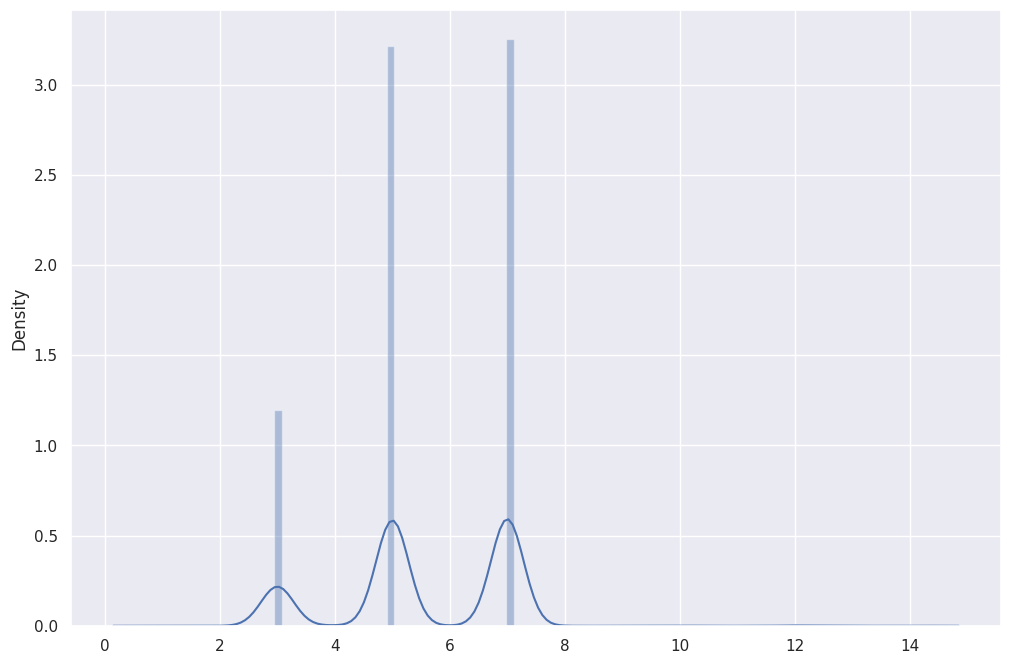

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
plt.figure(figsize=(12, 8))
sns.distplot(
    templates_per_class_count,
    kde=True,
    norm_hist=True,
    hist=True,
    label='probe_template_distr',
    bins=100
)

In [25]:
ijb_c.probe_ids

array([    1,     1,     1, ..., 28936, 28936, 28936])

In [ ]:
1

/home/erlygin/miniconda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

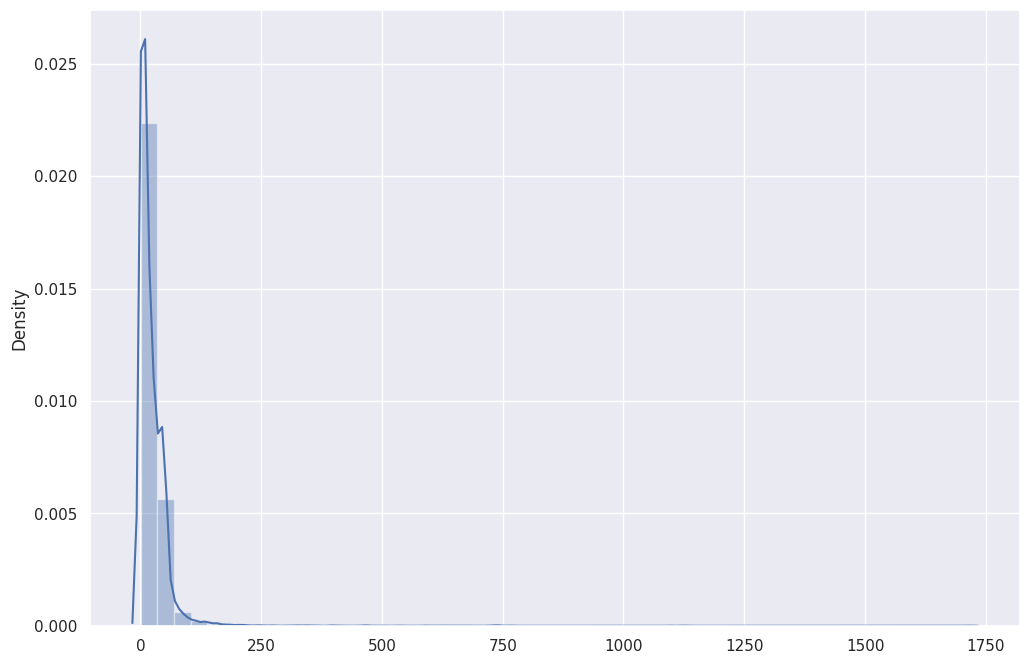

In [20]:

unique_counts_templates
sns.set_theme()
plt.figure(figsize=(12, 8))
sns.distplot(
    unique_counts_templates,
    kde=True,
    norm_hist=True,
    hist=True,
    label='probe_template_distr',
)

In [16]:
len(unique_templates)

19593